In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-63.054164315697975 165.60427641479788
84.05790774621832 -128.63316533808097
83.27386832070266 59.209213917604984
28.835183629405833 10.71513368070407
-13.414366026193605 -85.26026074661294
-4.225476160937006 -32.01012985460349
71.74169482598717 29.00910159096577
15.82925554569536 58.91349494294036
-44.70757538326461 19.457891642725144
75.5591167663668 30.43728787424689
33.1589422337064 -153.0628726885259
-27.036647788598543 -106.489024433876
89.71749965823787 -117.89152095959457
-81.17884577702873 -71.51496468004645
-42.71689033378089 108.30754903344496
-62.5508916206979 142.8768594436982
45.73471627626748 -167.26320481482998
33.65675137559393 -139.1716080257301
-30.427872267235053 -93.09135114059255
13.936946017519958 137.5178477035547
78.19178108943035 -154.28111592594286
21.00515217959324 -31.4547057669609
71.02524991251187 46.68846940831048
-29.026611811164337 -70.79535247410435
-6.21658006475009 -14.992000410016004
-62.61491339390092 136.64463141008702
81.0560241482099 81.7566294

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff06209f1e4a8f105115f1344d74f147


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | nalut
Processing Record 5 of Set 1 | huarmey
Processing Record 6 of Set 1 | natal
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | ahuimanu
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | vallenar
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | new norfolk
Processing Record 24 of Set 1 | dikson
Proces

Processing Record 39 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 40 of Set 4 | sorvag
City not found. Skipping...
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | plastun
Processing Record 43 of Set 4 | sibolga
Processing Record 44 of Set 4 | port blair
Processing Record 45 of Set 4 | sechura
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | nishihara
Processing Record 1 of Set 5 | querecotillo
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | arrifes
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | san cristobal
Processing Record 6 of Set 5 | makurdi
Processing Record 7 of Set 5 | makakilo city
Processing Record 8 of Set 5 | pangnirtung
Processing Record 9 of Set 5 | saint-philippe
Processing Record 10 of Set 5 | d

Processing Record 27 of Set 8 | meyungs
City not found. Skipping...
Processing Record 28 of Set 8 | conde
Processing Record 29 of Set 8 | waterloo
Processing Record 30 of Set 8 | mpika
Processing Record 31 of Set 8 | mizdah
Processing Record 32 of Set 8 | olenino
Processing Record 33 of Set 8 | weinan
Processing Record 34 of Set 8 | haines junction
Processing Record 35 of Set 8 | sitka
Processing Record 36 of Set 8 | angra dos reis
Processing Record 37 of Set 8 | neuquen
Processing Record 38 of Set 8 | turukhansk
Processing Record 39 of Set 8 | grand gaube
Processing Record 40 of Set 8 | kenai
Processing Record 41 of Set 8 | hambantota
Processing Record 42 of Set 8 | saint-francois
Processing Record 43 of Set 8 | ukhta
Processing Record 44 of Set 8 | kieta
Processing Record 45 of Set 8 | ulaanbaatar
Processing Record 46 of Set 8 | ukiah
Processing Record 47 of Set 8 | nova vicosa
Processing Record 48 of Set 8 | samarai
Processing Record 49 of Set 8 | yuzhno-sukhokumsk
Processing Record

Processing Record 12 of Set 12 | asayita
City not found. Skipping...
Processing Record 13 of Set 12 | balkhash
Processing Record 14 of Set 12 | tucuman
Processing Record 15 of Set 12 | qaqortoq
Processing Record 16 of Set 12 | tabat
Processing Record 17 of Set 12 | azimur
City not found. Skipping...
Processing Record 18 of Set 12 | rosario do sul
Processing Record 19 of Set 12 | colares
Processing Record 20 of Set 12 | ayr
Processing Record 21 of Set 12 | xushan
Processing Record 22 of Set 12 | olyka
Processing Record 23 of Set 12 | tatawin
Processing Record 24 of Set 12 | mezen
Processing Record 25 of Set 12 | fort nelson
Processing Record 26 of Set 12 | shingu
Processing Record 27 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 28 of Set 12 | muros
Processing Record 29 of Set 12 | ongandjera
Processing Record 30 of Set 12 | jaypur
Processing Record 31 of Set 12 | ahipara
Processing Record 32 of Set 12 | higuey
City not found. Skipping...
Processing Record 33 of Set

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,56.19,79,100,22.75,NZ,2022-11-08 23:03:00
1,Tuktoyaktuk,69.4541,-133.0374,15.80,73,75,11.50,CA,2022-11-08 22:58:37
2,Nalut,30.3333,10.8500,60.62,35,0,8.16,LY,2022-11-08 23:03:00
3,Huarmey,-10.0681,-78.1522,65.86,81,15,8.08,PE,2022-11-08 23:03:01
4,Natal,-5.7950,-35.2094,79.45,83,0,10.36,BR,2022-11-08 23:00:15
5,Berlevag,70.8578,29.0864,35.55,87,100,4.61,NO,2022-11-08 23:03:02
6,Salalah,17.0151,54.0924,77.09,78,20,2.30,OM,2022-11-08 23:03:02
7,Bredasdorp,-34.5322,20.0403,58.23,76,92,7.05,ZA,2022-11-08 22:58:39
8,Ahuimanu,21.4447,-157.8378,83.86,64,75,14.97,US,2022-11-08 23:03:03
9,Rikitea,-23.1203,-134.9692,75.63,88,91,14.03,PF,2022-11-08 22:58:42


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df  = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-11-08 23:03:00,-46.6000,168.3333,56.19,79,100,22.75
1,Tuktoyaktuk,CA,2022-11-08 22:58:37,69.4541,-133.0374,15.80,73,75,11.50
2,Nalut,LY,2022-11-08 23:03:00,30.3333,10.8500,60.62,35,0,8.16
3,Huarmey,PE,2022-11-08 23:03:01,-10.0681,-78.1522,65.86,81,15,8.08
4,Natal,BR,2022-11-08 23:00:15,-5.7950,-35.2094,79.45,83,0,10.36
5,Berlevag,NO,2022-11-08 23:03:02,70.8578,29.0864,35.55,87,100,4.61
6,Salalah,OM,2022-11-08 23:03:02,17.0151,54.0924,77.09,78,20,2.30
7,Bredasdorp,ZA,2022-11-08 22:58:39,-34.5322,20.0403,58.23,76,92,7.05
8,Ahuimanu,US,2022-11-08 23:03:03,21.4447,-157.8378,83.86,64,75,14.97
9,Rikitea,PF,2022-11-08 22:58:42,-23.1203,-134.9692,75.63,88,91,14.03


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
# File to Load (Remember to change these)
city_data_to_load = "weather_data/cities.csv"

In [6]:
# Read the City Data
city_data_df = pd.read_csv(city_data_to_load)

In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

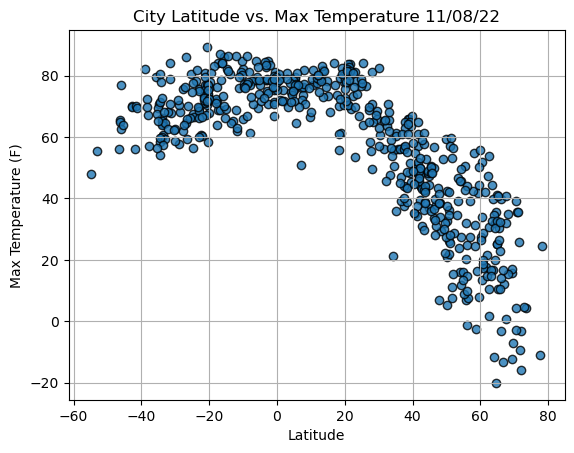

In [8]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

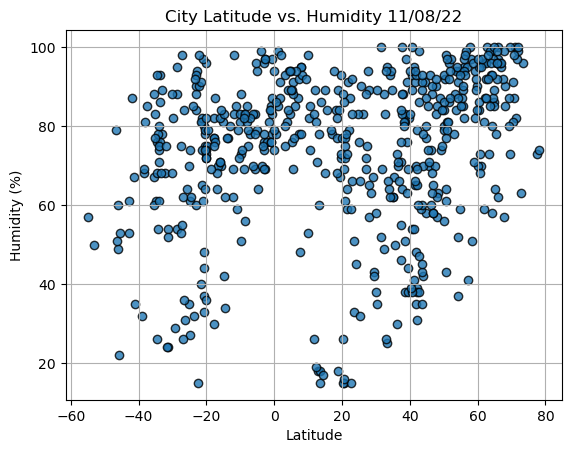

In [9]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

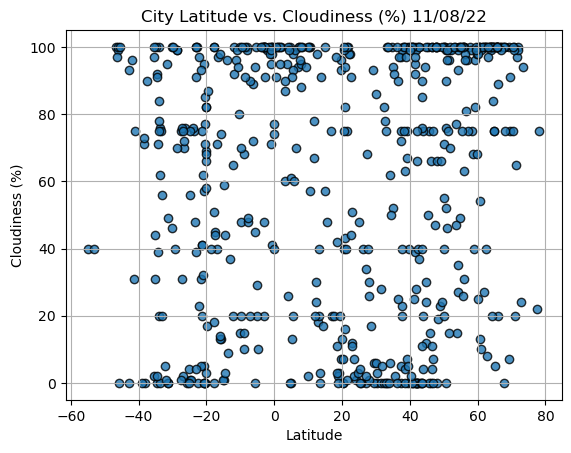

In [10]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

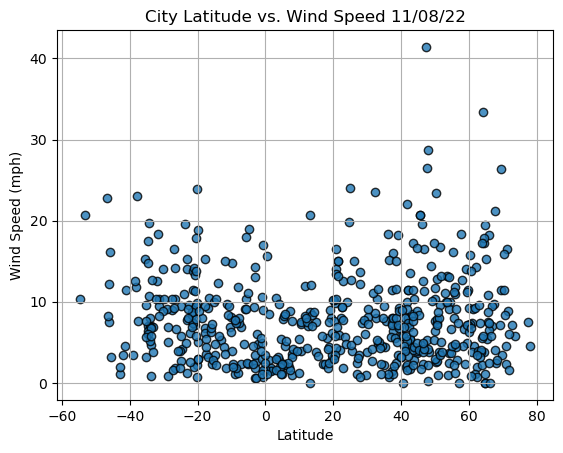

In [11]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [12]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

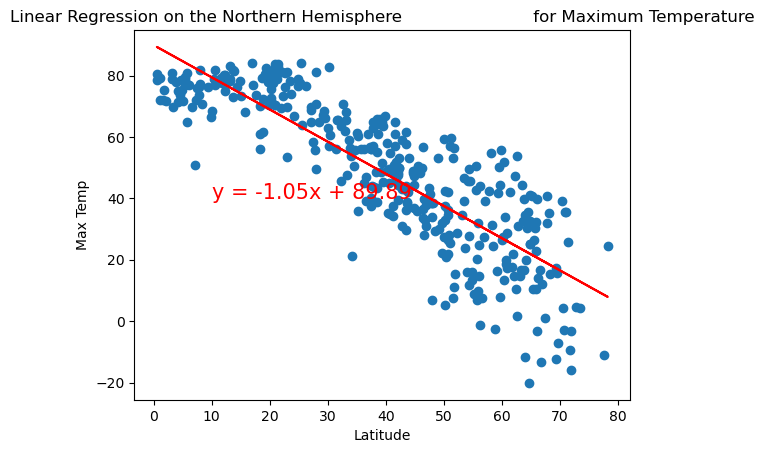

In [14]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

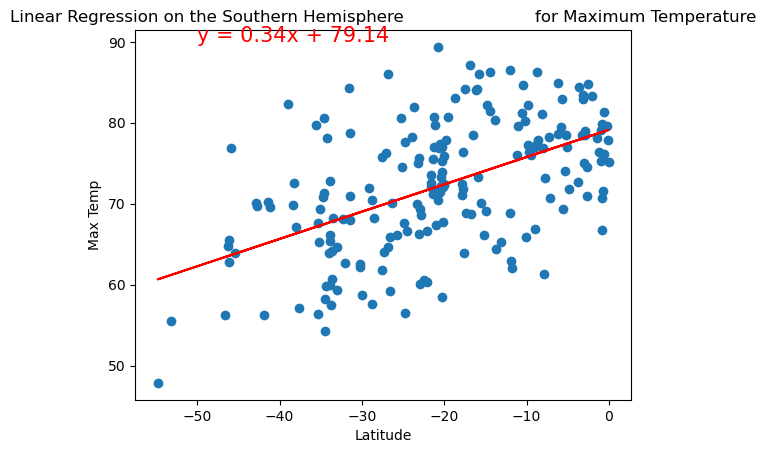

In [15]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

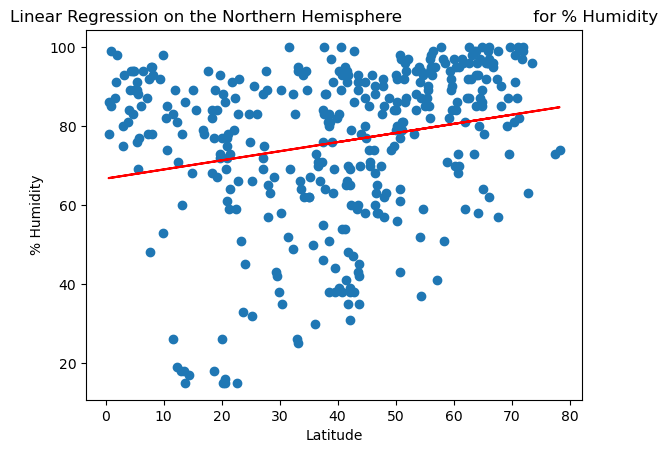

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

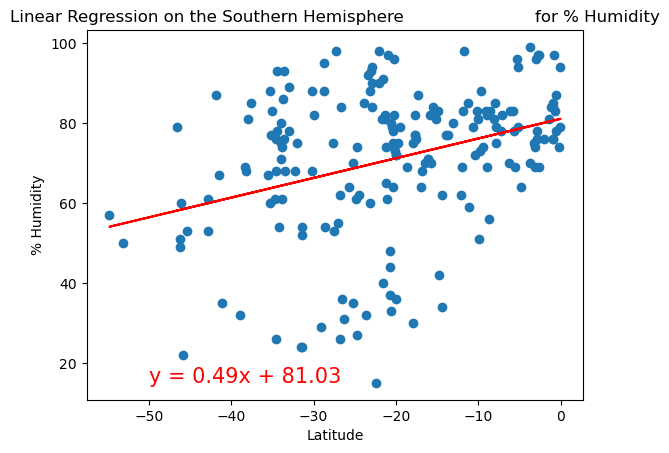

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

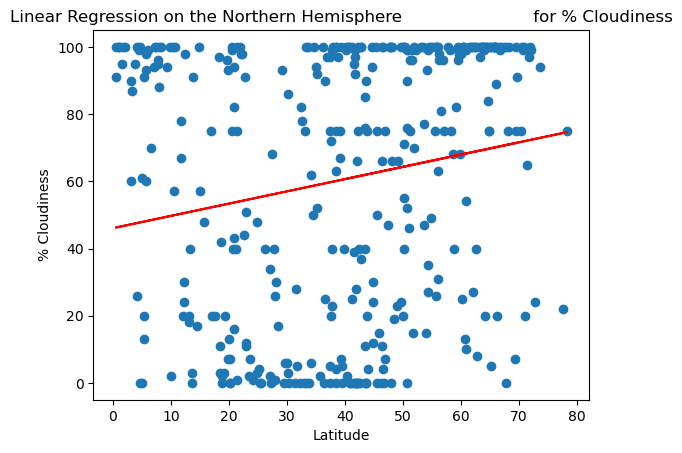

In [20]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

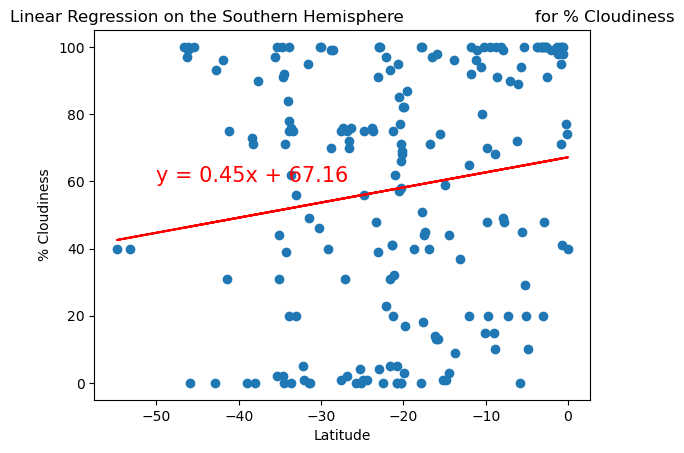

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

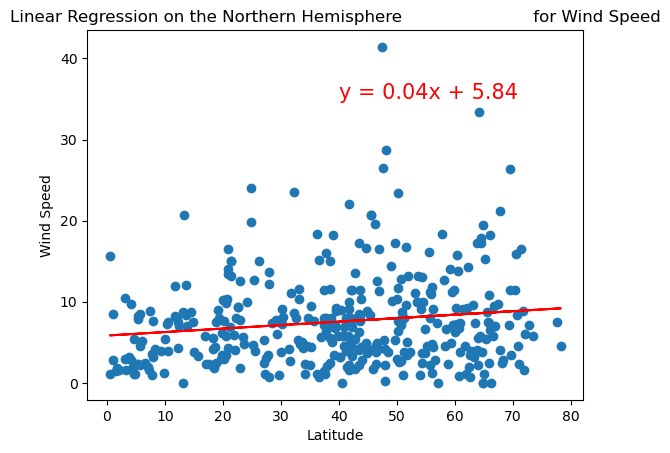

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

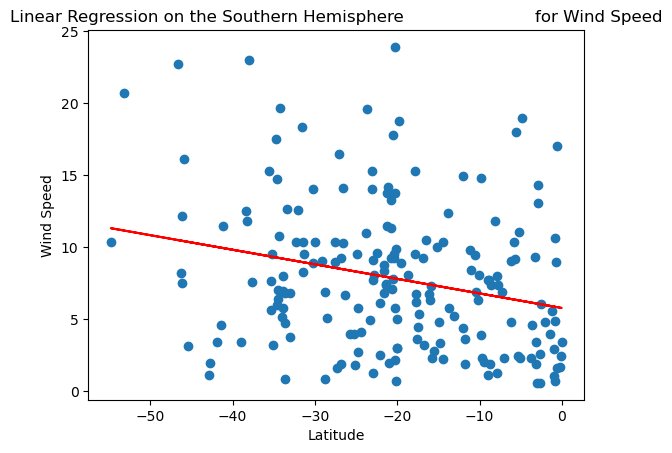

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))